**Experiment#2: GB classification using Processed Cleveland Data**


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/heart-disease.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df1 = df.copy()

In [ ]:
new_columns = ['Age','Sex','CP','ResBP','SC','FastBS','RestECG','MaxHR','ExeIA','OldPST','SlopePE','MajorVC','TS','L']

df1.columns = new_columns
df1.head()

,Age,Sex,CP,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,SlopePE,MajorVC,TS,L
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df1.describe()

,Age,Sex,CP,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,SlopePE,MajorVC,TS,L
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**One-hot Encoding to categorical variables.**

In [ ]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df1['CP'], prefix='CP')
thal = pd.get_dummies(df1['TS'], prefix='TS')
slope = pd.get_dummies(df1['SlopePE'], prefix='SlopePE')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df1, cp, thal, slope]
df1 = pd.concat(frames, axis = 1)

In [ ]:
df1.head()

,Age,Sex,CP,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,...,CP_1,CP_2,CP_3,TS_0,TS_1,TS_2,TS_3,SlopePE_0,SlopePE_1,SlopePE_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# --- Drop Unnecessary Variables ---
df1 = df1.drop(columns = ['CP', 'TS', 'SlopePE'])

In [ ]:
df1.head()

,Age,Sex,ResBP,SC,FastBS,RestECG,MaxHR,ExeIA,OldPST,MajorVC,...,CP_1,CP_2,CP_3,TS_0,TS_1,TS_2,TS_3,SlopePE_0,SlopePE_1,SlopePE_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
# separating the dependent features
x = df1.drop(['L'], axis = 1)
y = df1['L']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

**Gradient Boost with default parameters**

In [ ]:
# --- Applying Gradient Boosting ---
classifierGB = GradientBoostingClassifier()

classifierGB.fit(x_train, y_train)
GBy_pred = classifierGB.predict(x_test)
# Calculate accuracy
acGB = accuracy_score(y_test, GBy_pred)
precisionGB = precision_score(y_test, GBy_pred)
recallGB = recall_score(y_test, GBy_pred)
f1GB = f1_score(y_test, GBy_pred)
auc_rocGB = roc_auc_score(y_test, GBy_pred)

print("Accuracy of GB:", acGB)
print("Precision of GB:", precisionGB)
print("Recall of GB:", recallGB)
print("F1-score of GB:", f1GB)
print("AUC-ROC of GB:", auc_rocGB)

# Calculate MCC
mccGB = matthews_corrcoef(y_test, GBy_pred)
print("MCC of GB:", mccGB)

# Calculate prediction time
import time
start_time = time.time()

p_timeGB = time.time() - start_time
print("Prediction Time:", p_timeGB)

Accuracy of GB: 0.8688524590163934
Precision of GB: 0.918918918918919
Recall of GB: 0.8717948717948718
F1-score of GB: 0.8947368421052632
AUC-ROC of GB: 0.8677156177156178
MCC of GB: 0.7229016773302128
Prediction Time: 6.699562072753906e-05


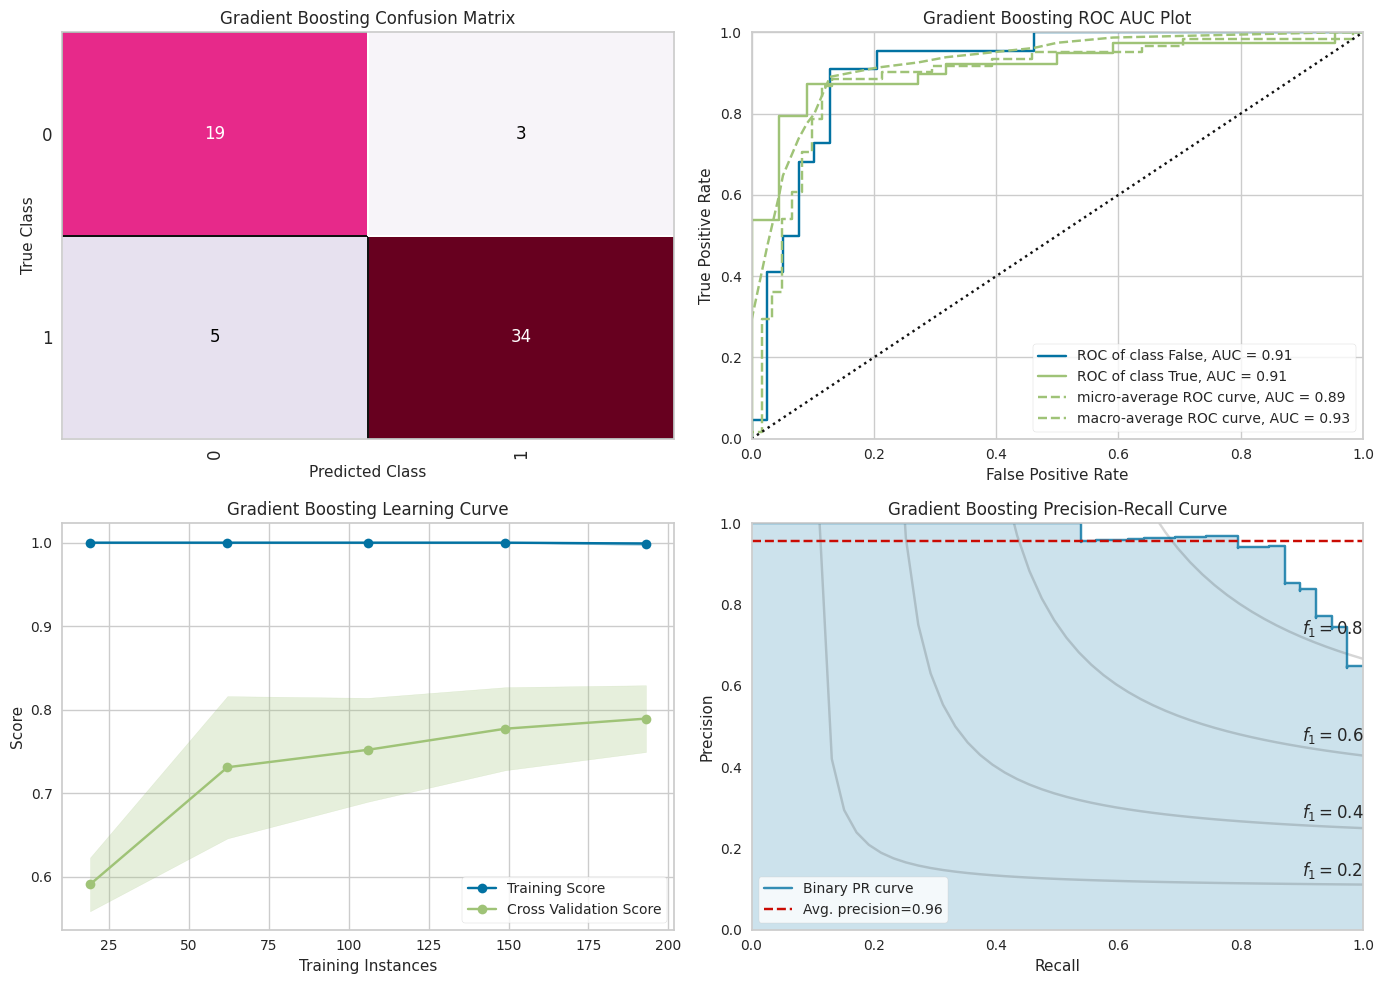

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(classifierGB, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(classifierGB, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(classifierGB, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(classifierGB, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();